In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
url= "brain_stroke.csv"

In [5]:
brain = pd.read_csv(url)
brain.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
## We decide to transform all the data in numeric data, because it's more easier to use and compare 
## data with numeric values
## And we decide that "work_type" and "residence_type" are not very usefull to predict if a person 
## can have a brain stroke or not

In [7]:
mapping = {'Male': 0, 'Female': 1, 'Yes': 1, 'No': 0, 'Unknown': 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes': 3}
brain = brain.replace({'gender': mapping, 'ever_married' : mapping, 'smoking_status': mapping})
brain_num = brain.drop(["work_type", "Residence_type"], axis=1)
brain_num.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,228.69,36.6,2,1
1,0,80.0,0,1,1,105.92,32.5,1,1
2,1,49.0,0,0,1,171.23,34.4,3,1
3,1,79.0,1,0,1,174.12,24.0,1,1
4,0,81.0,0,0,1,186.21,29.0,2,1


In [8]:
# With the correlation algorithme we can see what features is the most interresting 
# This is a Filter Method

In [9]:
corr_matrix = brain_num.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.246478
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
ever_married         0.108398
bmi                  0.056926
smoking_status       0.054793
gender              -0.008870
Name: stroke, dtype: float64

In [10]:
# With the "univariate selection", with the "SelectKBest" function in scikit-learn, we try 
# to find the 5 best features in our dataset
# this is a Wrapper Method

In [11]:
X = brain_num.iloc[:,0:8]
y = brain_num.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(5,'Score'))

               Specs        Score
1                age  3578.674662
5  avg_glucose_level  1695.196533
3      heart_disease    85.272411
2       hypertension    78.401543
6                bmi    26.111232


In [12]:
# This is the method "Feature importance", with the "Extra trees Classifier" function in scikit-learn,
# we try to find the five best features with this method too

[0.02244629 0.27497556 0.02185201 0.02324798 0.01671937 0.29662444
 0.27466955 0.06946481]


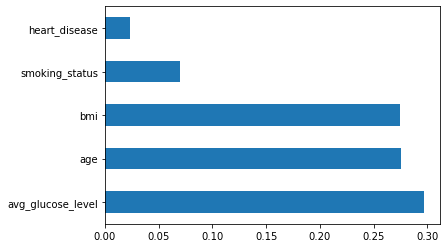

In [13]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [14]:
# We want to use PCA from scikit-learn library, for this we need to standardize the data

In [15]:
features = ['gender','age','hypertension','ever_married', 'avg_glucose_level', 'bmi','smoking_status']
# Separating out the features
x = brain_num.loc[:, features].values
# Separating out the target
y = brain_num.loc[:,['stroke']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
brain_test = pd.DataFrame(x, columns=['gender','age','hypertension','ever_married', 'avg_glucose_level', 'bmi','smoking_status'])
brain_test.head()

,gender,age,hypertension,ever_married,avg_glucose_level,bmi,smoking_status
0,-1.183909,1.040584,-0.326186,0.720137,2.723411,1.193238,0.790469
1,-1.183909,1.614270,-0.326186,0.720137,-0.000523,0.589390,-0.178838
2,0.844660,0.246250,-0.326186,0.720137,1.448529,0.869222,1.759775
3,0.844660,1.570141,3.065738,0.720137,1.512650,-0.662492,-0.178838
4,-1.183909,1.658400,-0.326186,0.720137,1.780895,0.073909,0.790469


In [16]:
# Now appli the PCA in two dimension

In [17]:
from sklearn.decomposition import PCA
pca_brain = PCA(n_components=2)
principalComponents_brain = pca_brain.fit_transform(x)
principal_brain_data = pd.DataFrame(data = principalComponents_brain
             , columns = ['principal component 1', 'principal component 2'])
final_brain = pd.concat([principal_brain_data, brain_num[['stroke']]], axis = 1)
final_brain.head()

,principal component 1,principal component 2,stroke
0,2.314804,1.701292,1
1,1.334051,0.494870,1
2,1.763879,-0.538178,1
3,2.150142,1.065223,1
4,1.938705,1.232691,1


In [18]:
# This is the figure with the 2 principal component

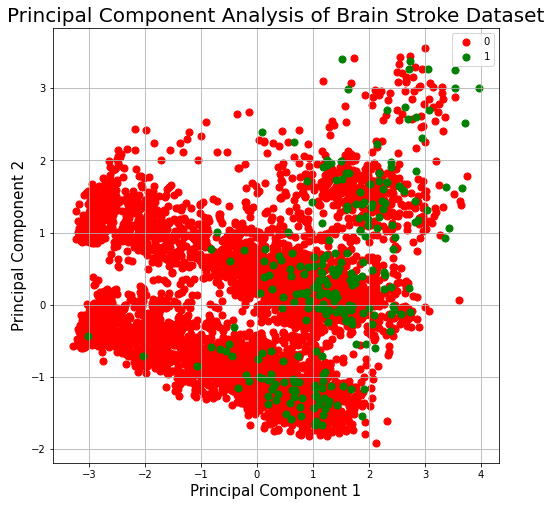

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title("Principal Component Analysis of Brain Stroke Dataset", fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_brain['stroke'] == target
    ax.scatter(final_brain.loc[indicesToKeep, 'principal component 1']
               ,final_brain.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [20]:
# We wanted to try with some new feature like numbers of stroke per age or stoke per glucose level
# but we don't reduce our dataset with this, and we're not sure it's usefull

In [21]:
brain_num["stroke_per_age"]=brain_num["stroke"]/brain_num["age"]
brain_num["stroke_per_glucose"]=brain_num["stroke"]/brain_num["avg_glucose_level"]
# brain_num["stroke_per_heart_disease"]=brain_num["stroke"]/brain_num["heart_disease"]
# brain_num["stroke_per_hypertension"]=brain_num["stroke"]/brain_num["hypertension"]
cols_at_end = ['stroke']
brain_num = brain_num[[c for c in brain_num if c not in cols_at_end] 
                        + [c for c in cols_at_end if c in brain_num]]
brain_num.head()


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke_per_age,stroke_per_glucose,stroke
0,0,67.0,0,1,1,228.69,36.6,2,0.014925,0.004373,1
1,0,80.0,0,1,1,105.92,32.5,1,0.012500,0.009441,1
2,1,49.0,0,0,1,171.23,34.4,3,0.020408,0.005840,1
3,1,79.0,1,0,1,174.12,24.0,1,0.012658,0.005743,1
4,0,81.0,0,0,1,186.21,29.0,2,0.012346,0.005370,1


In [22]:
corr_matrix = brain_num.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke                1.000000
stroke_per_glucose    0.916501
stroke_per_age        0.354299
age                   0.246478
heart_disease         0.134610
avg_glucose_level     0.133227
hypertension          0.131965
ever_married          0.108398
bmi                   0.056926
smoking_status        0.054793
gender               -0.008870
Name: stroke, dtype: float64

In [23]:
X = brain_num.iloc[:,0:10]
y = brain_num.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                Specs        Score
1                 age  3578.674662
5   avg_glucose_level  1695.196533
8      stroke_per_age    86.965392
3       heart_disease    85.272411
2        hypertension    78.401543
9  stroke_per_glucose    44.062533
6                 bmi    26.111232
4        ever_married    19.987006
7      smoking_status    13.437426
0              gender     0.163171


[4.45061487e-04 1.63375923e-02 5.07618386e-03 6.24877440e-03
 2.54169893e-03 6.78101819e-03 1.49436337e-03 8.43745925e-04
 3.48423180e-01 6.11808381e-01]


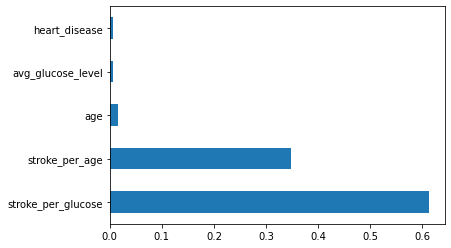

In [24]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [25]:
# Use classifier on our data to test
# brain_num is the principal dataset and we are going to compare with final_brain dataset

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [27]:
# first on brain_num

In [28]:
X = brain_num.iloc[:,0:8]
y = brain_num.iloc[:,-1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100) # 70% training and 30% test


In [30]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train_std, y_train)

SVC(kernel='linear')

In [32]:
y_pred = clf.predict(X_test_std)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9525083612040134


In [33]:
X2 = final_brain.iloc[:,0:2]
y2 = final_brain.iloc[:,-1]

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3,random_state=100) # 70% training and 30% test

In [35]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train2, y_train2)

SVC(kernel='linear')

In [36]:
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9525083612040134
